In [10]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\sony\appdata\roaming\jupyterlab-desktop\jlab_server\lib\site-packages (1.1.1)



In [14]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [21]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SONY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SONY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SONY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import wordcloud,STOPWORDS
#define a function to plot word cloud
def plot_cloud(wordcloud):
  #set figure size
  plt.figure(figsize=(40,30))
  #Display image
  plt.inshow(wordcloud)
  #No axis details
  plt.axis("off")

# 1 - Business Problem
1) Extract reviews of any product from ecommerce website like snapdeal and amazon

2) Perform sentimental analysis



# 2 - Data collection and description
2.1 Connecting to Amazom and download reviews

In [23]:
oneplus_reviews=[]

In [24]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

 2.2 Downloading review from Amazon.in for the phone OnePlus 7

In [25]:
oneplus_reviews = list(set(oneplus_reviews))

2.3 Cleaning the text

In [26]:
txt_upd = ' '.join(oneplus_reviews)

In [27]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [28]:
text_tokens = word_tokenize(txt_upd)

In [29]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

# 2.4 Create the DF

In [30]:
tf = Tfidtf = TfidfVectorizer()


In [32]:
text_tf = tf.fit_transform(tokens_without_sw)

In [33]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

C:\Users\SONY\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
df

,adapter,adaptor,added,amazing,amazon,ambiance,amoeld,amoled,android,angle,...,wondering,work,working,worst,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
word_list = ' '.join(df)

In [36]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

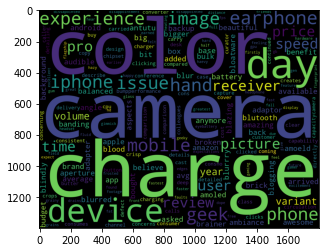

In [37]:
plt.imshow(wordcloud)

# 3 Sentimental Analysis

In [38]:
with open("C:/Users/SONY/Downloads/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [39]:
positive_words = positive_words[35:]

In [40]:
with open("C:/Users/SONY/Downloads/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [41]:
negative_words = negative_words[35:]

In [42]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [56]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [63]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [64]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

# 4 Conclusion

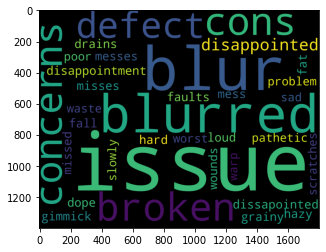

In [65]:
plt.imshow(wordcloud_neg)

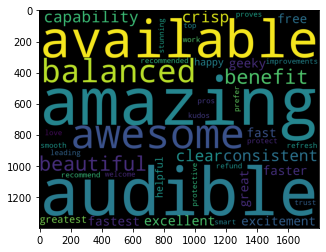

In [66]:
plt.imshow(wordcloud_pos)